In [1]:
import pandas as pd
import numpy as np

In [2]:
file_name = 'data/cyan_ndvi_points.csv'
df = pd.read_csv(file_name)
# new column id is lat * lon
df['id'] = df['lat'] * df['lon']
# change each id into a unique integer
df['id'] = df['id'].astype('category').cat.codes
# convert the time column to datetime
df['time'] = pd.to_datetime(df['time'])

In [3]:
s2 = df.copy()
#remove rows where qa.sentinel2 is not 1
s2 = s2[s2['qa.sentinel2'] == 1]
# remove rows where ndvi.sentinel2 is the same as the previous row
s2 = s2[s2['ndvi.sentinel2'] != s2['ndvi.sentinel2'].shift(1)]

In [4]:
l8 = df.copy()
# select only rows where source.streambatch == 2.0
l8 = l8[l8['source.streambatch'] == 2]

In [5]:
modis = df.copy()
# select only rows where source.streambatch == 1.0
modis = modis[modis['source.streambatch'] == 1.0]

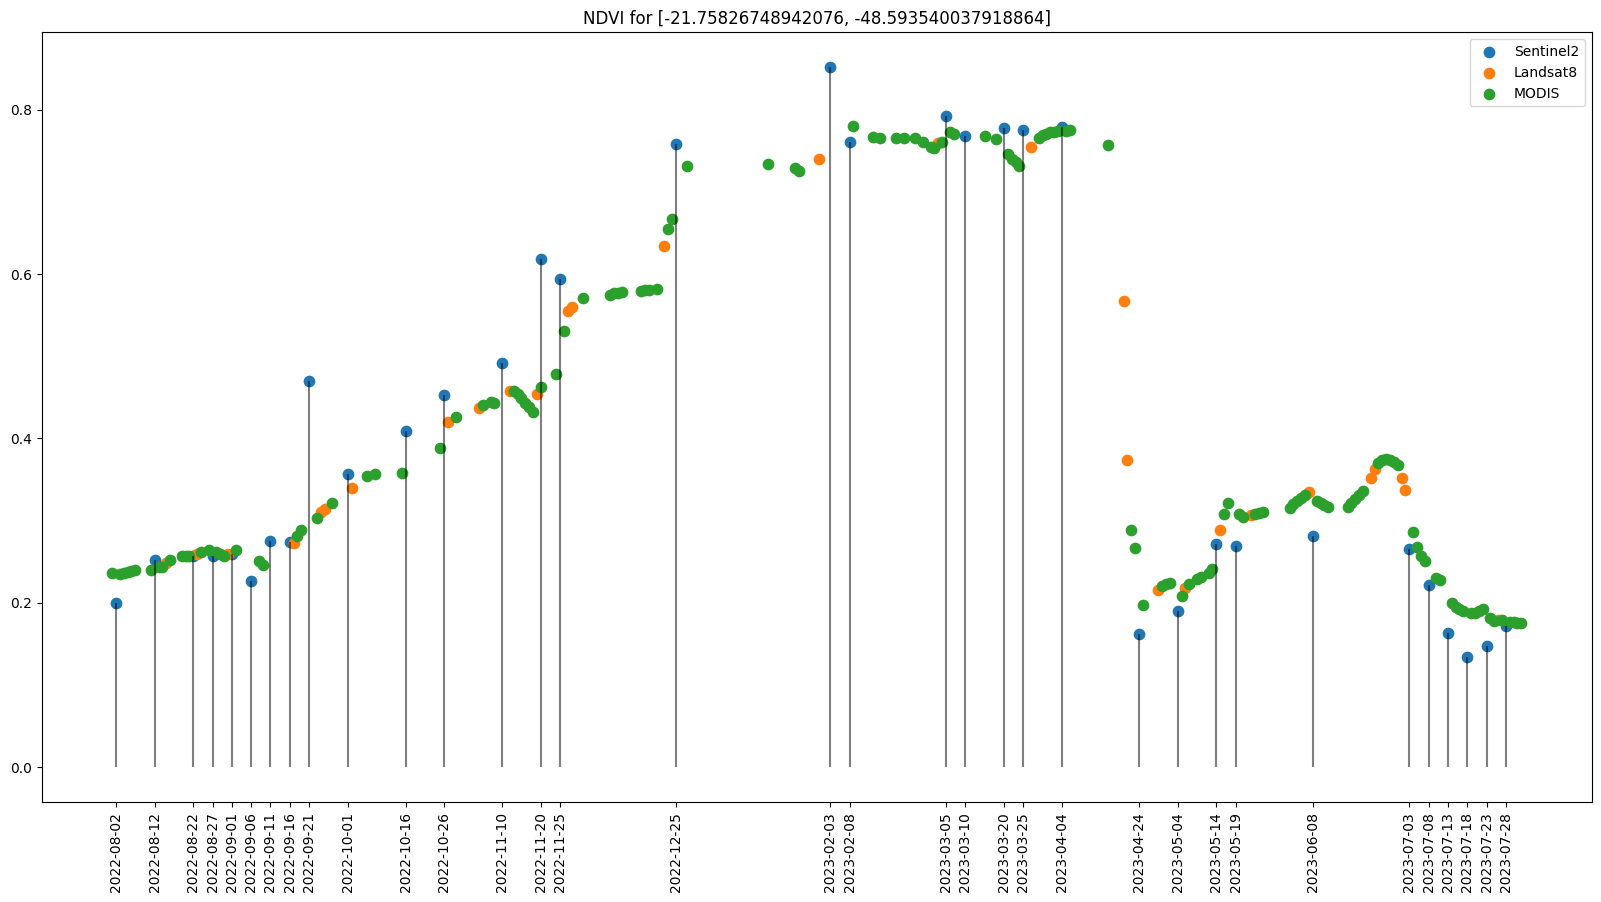

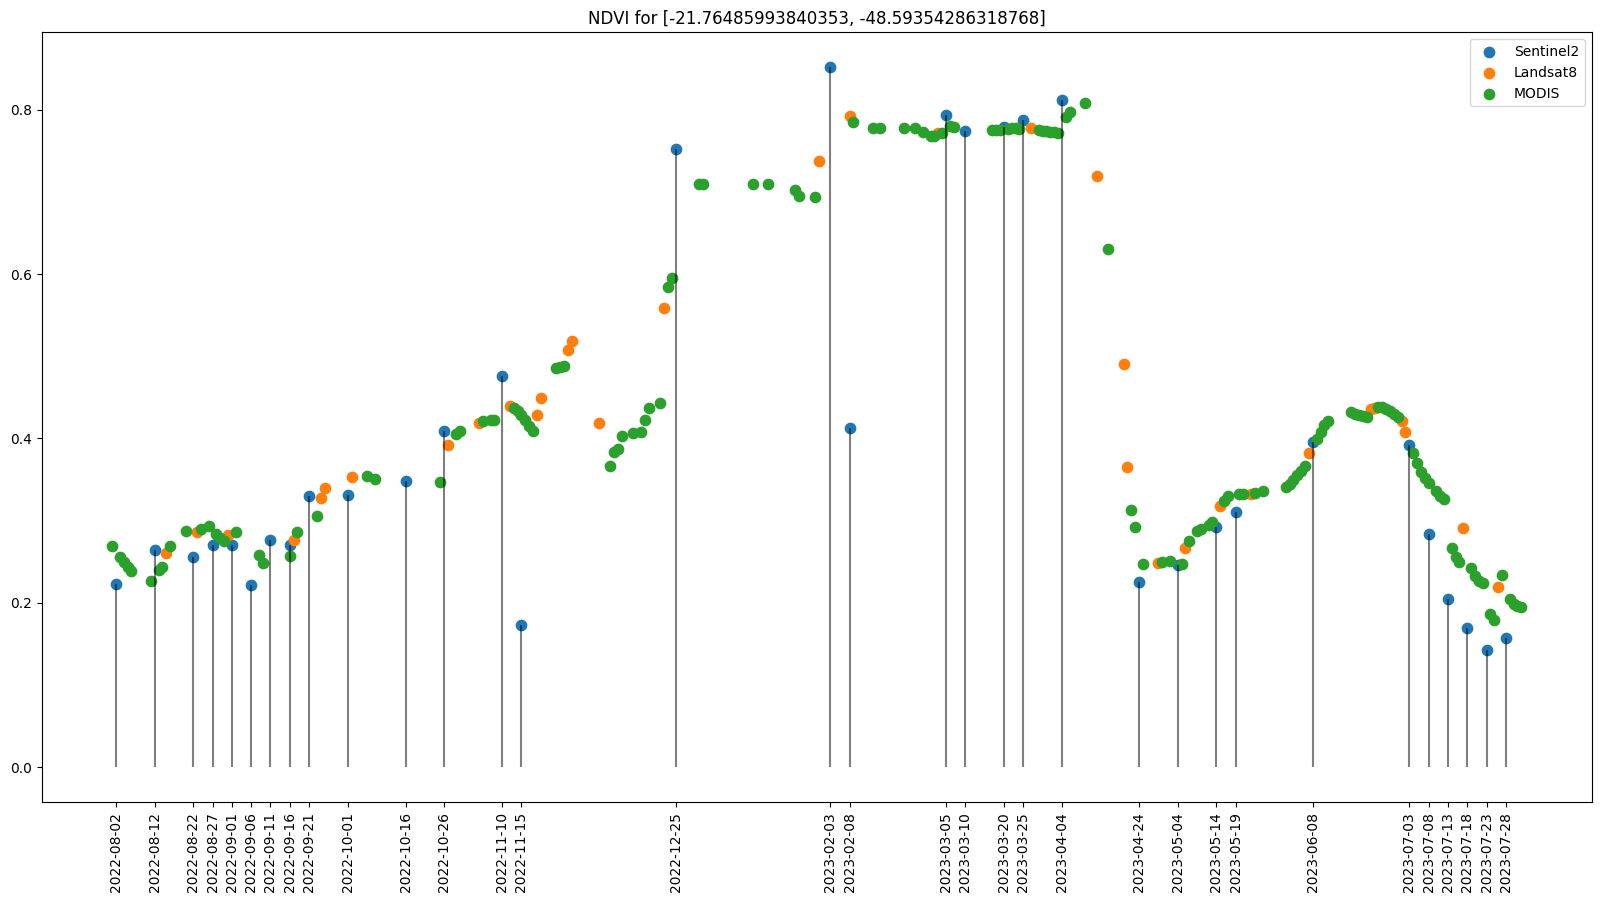

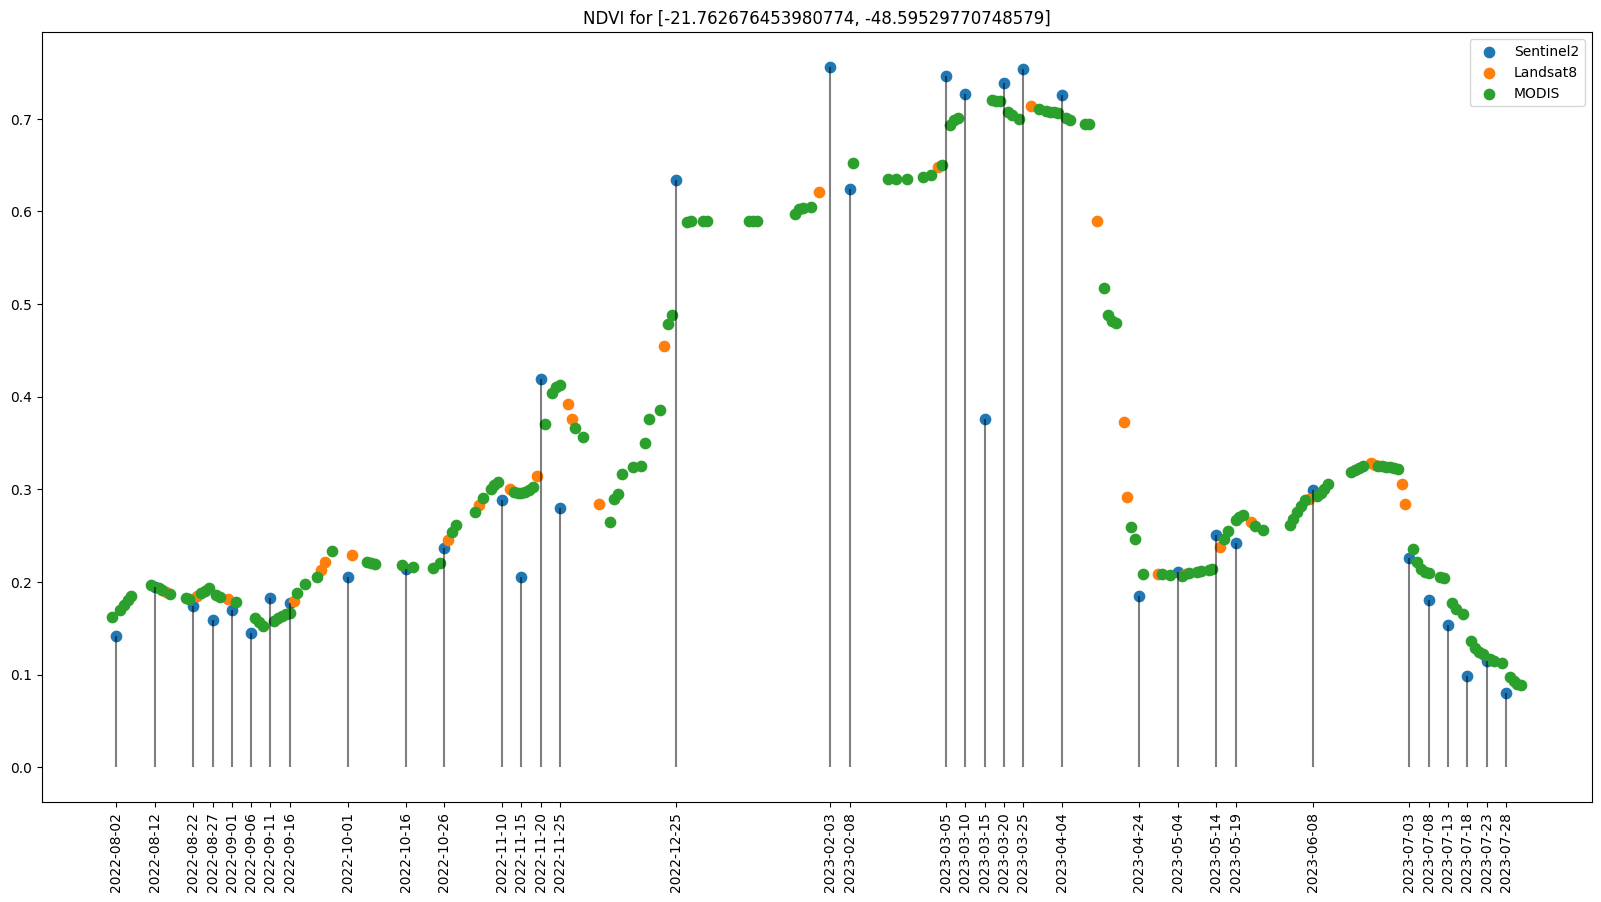

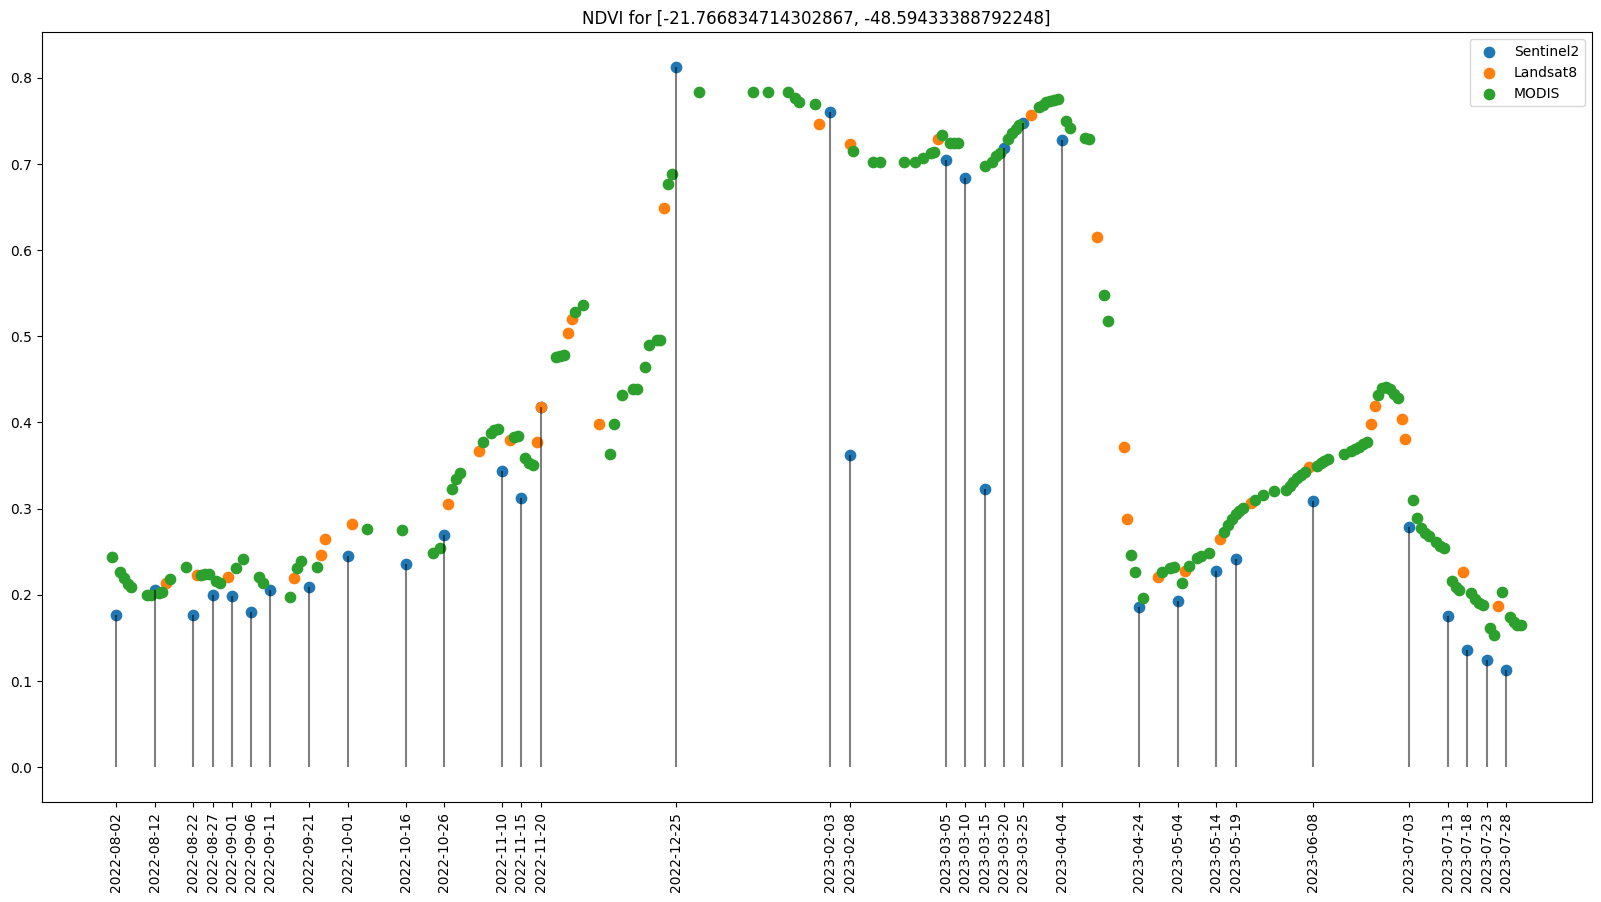

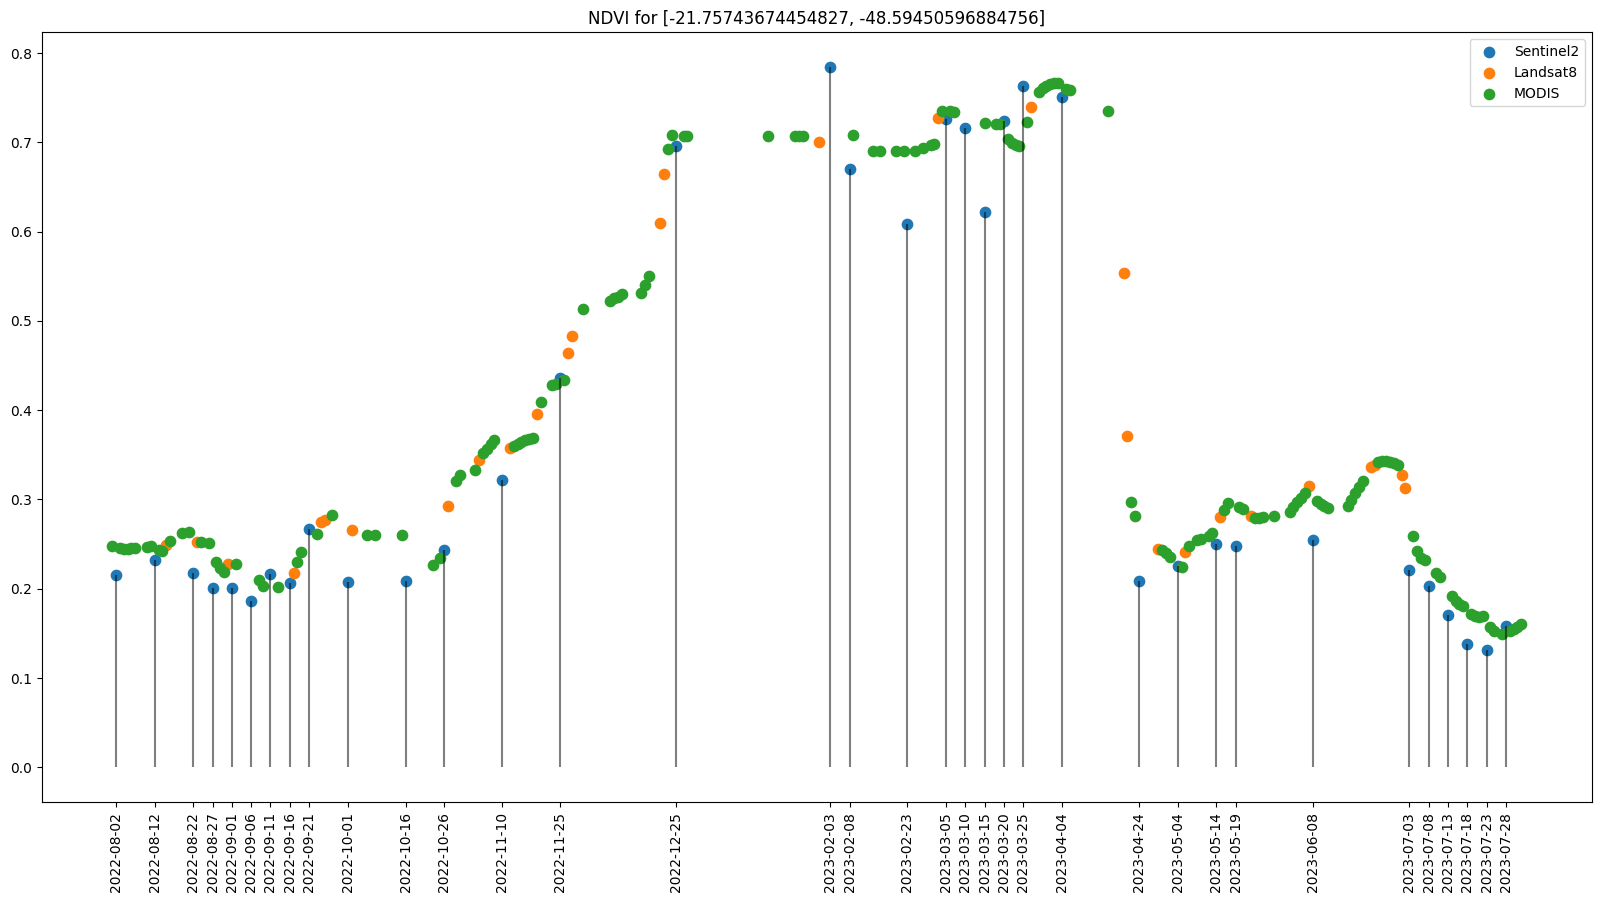

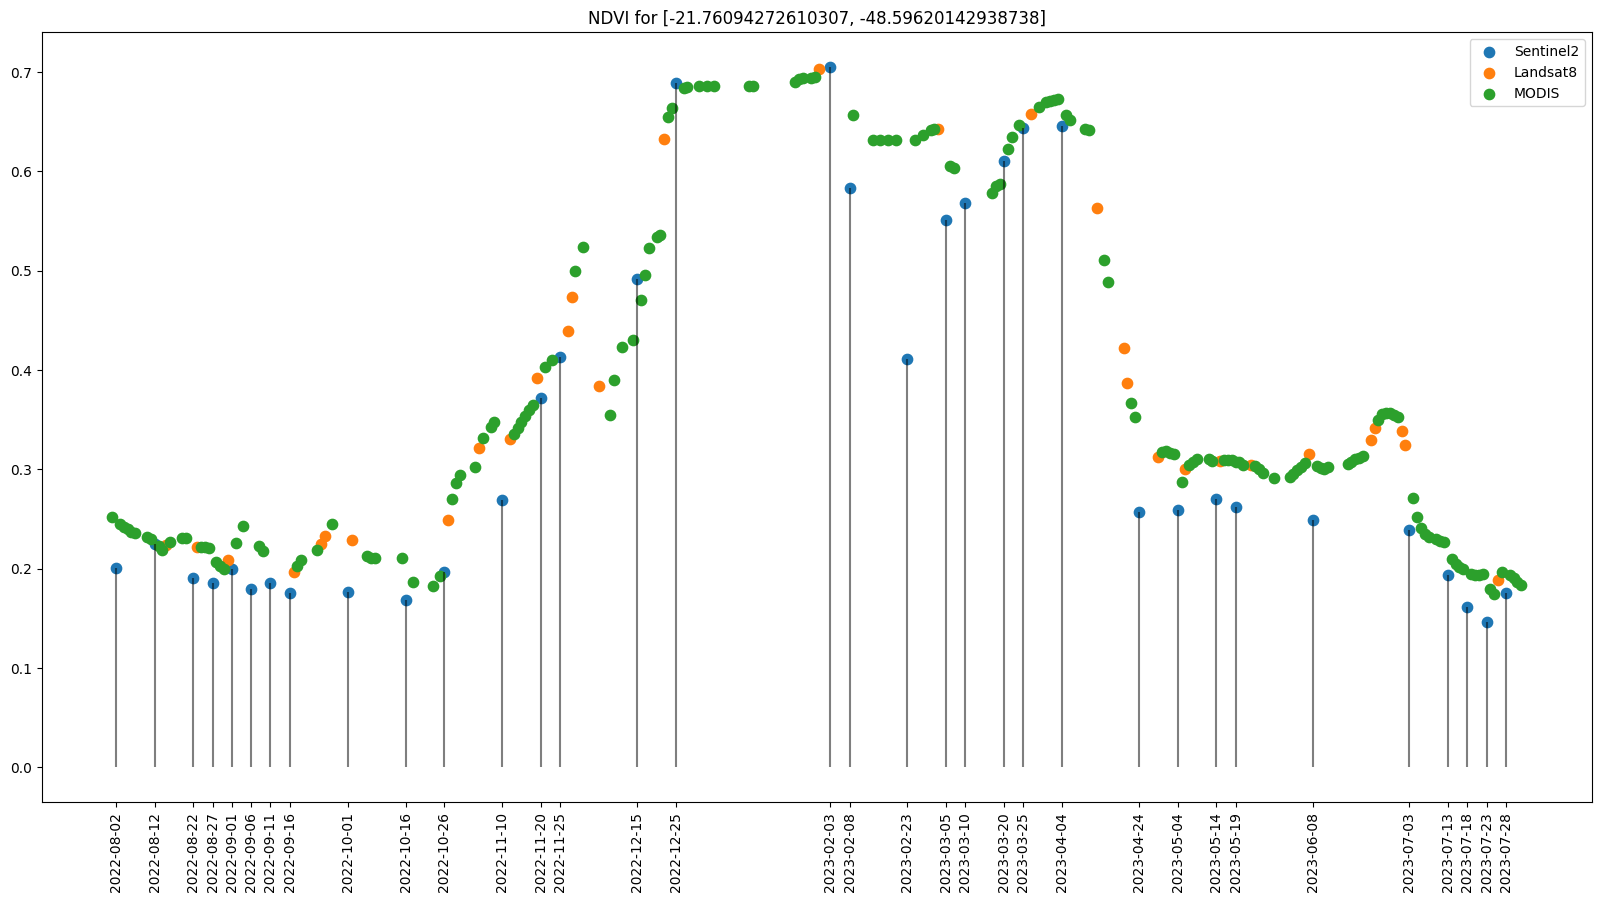

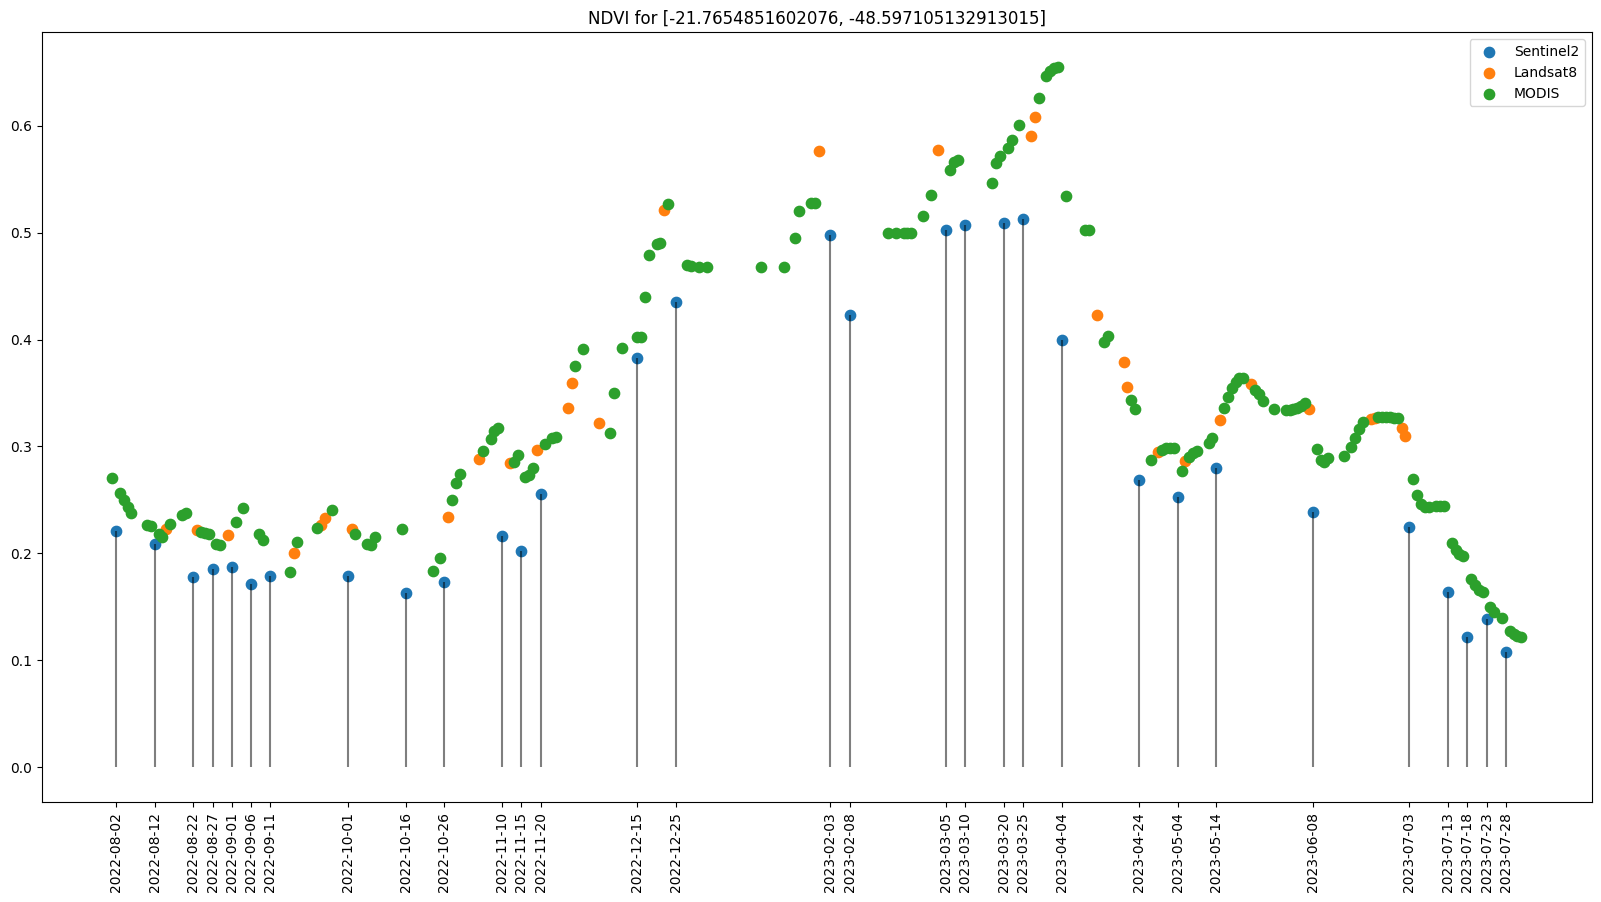

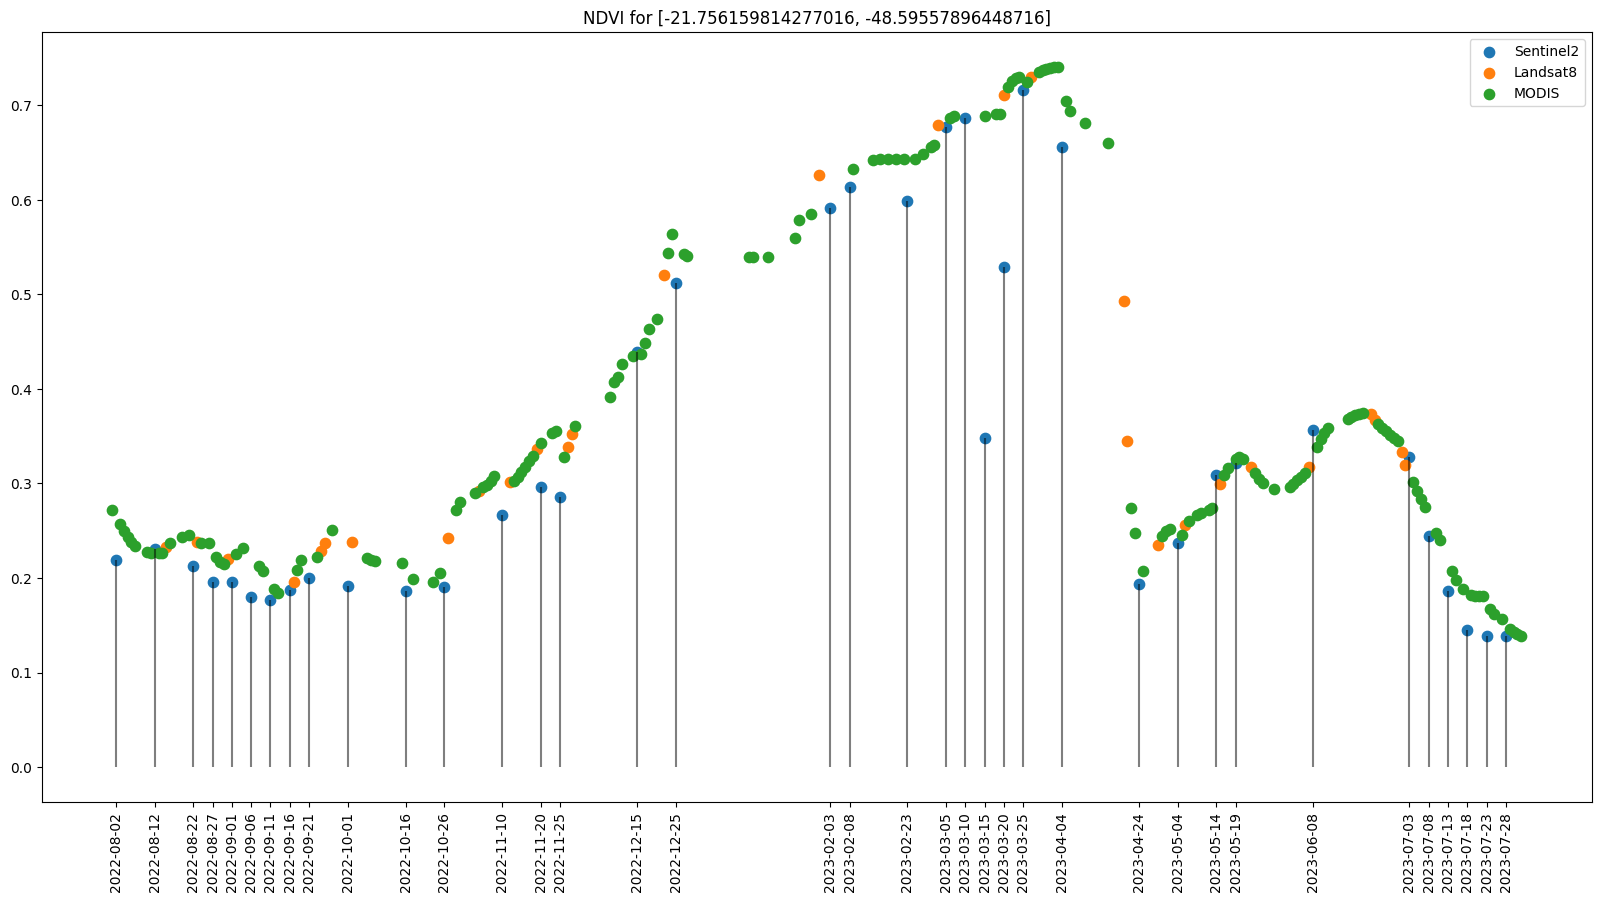

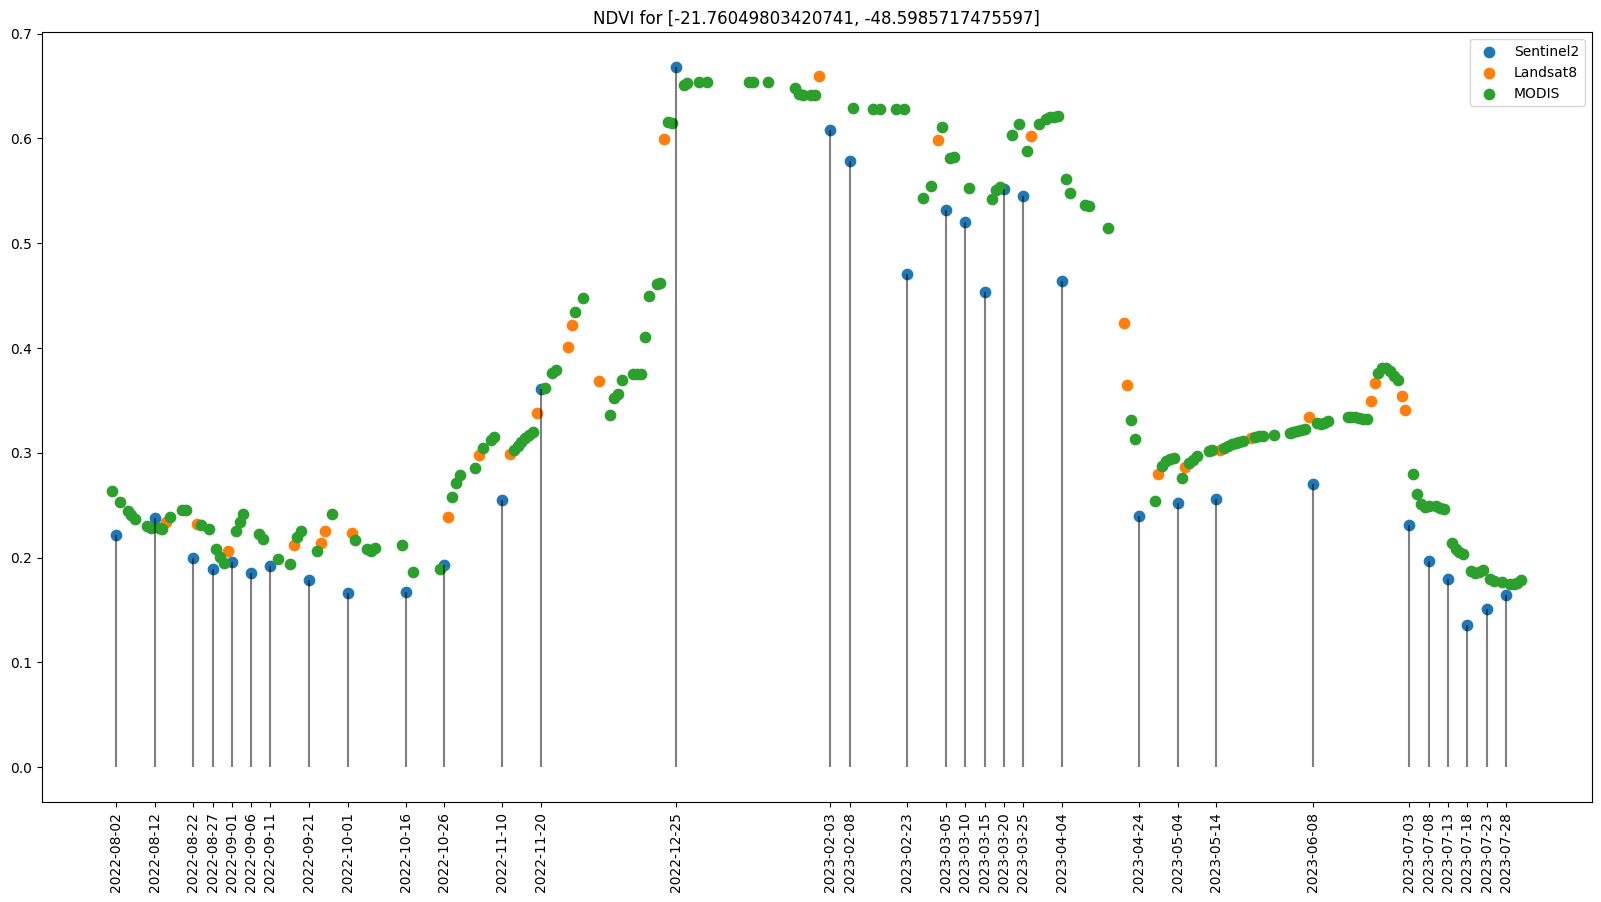

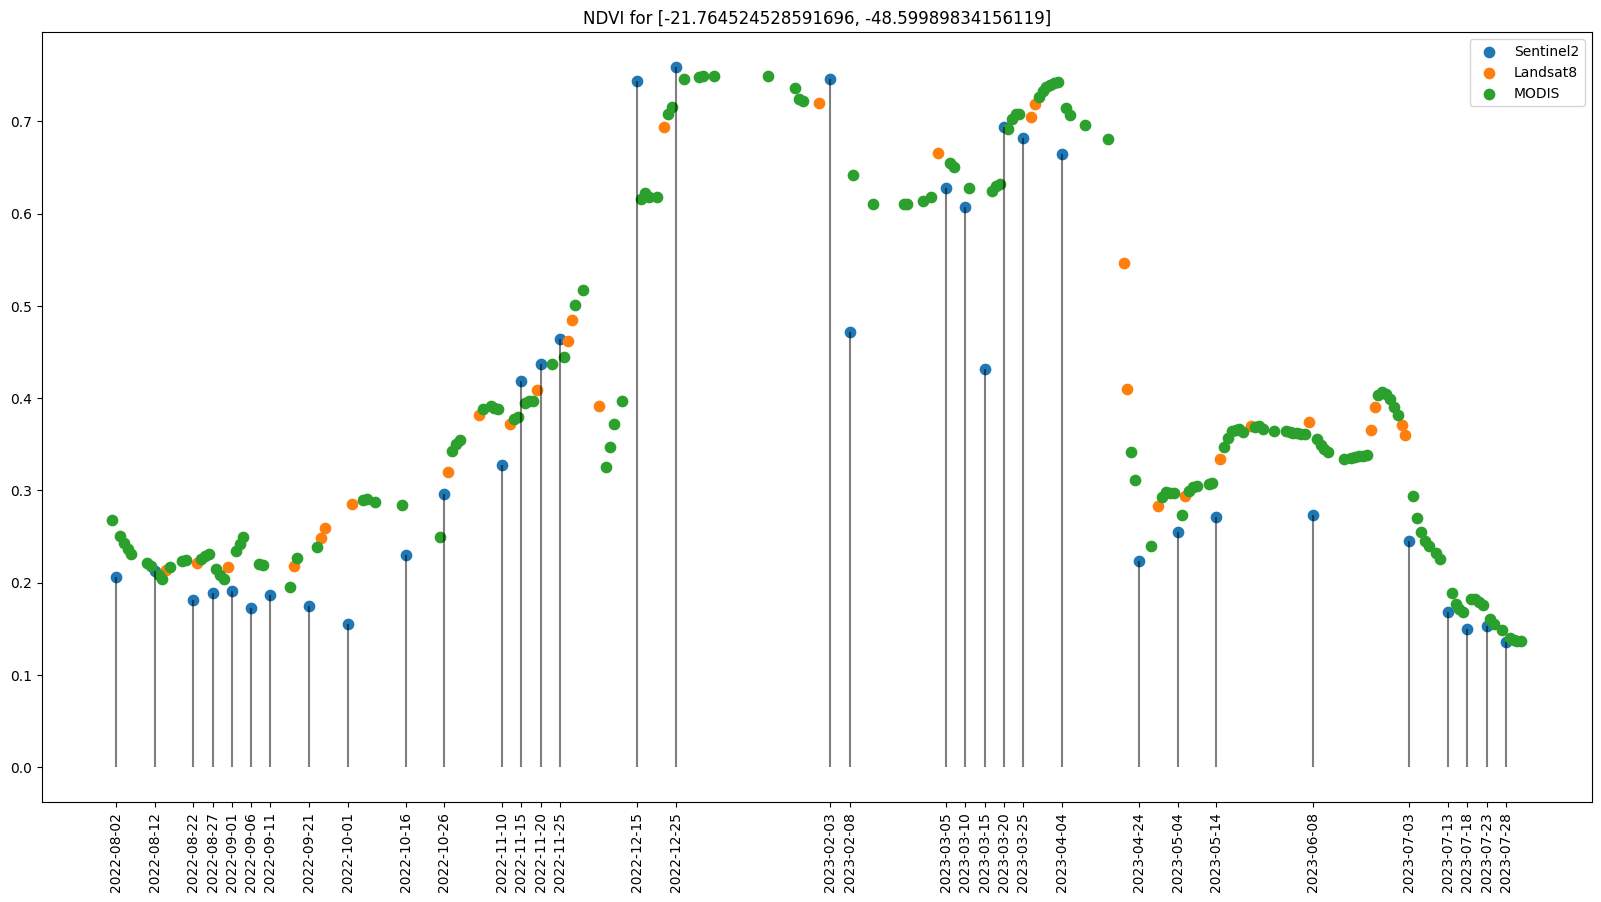

In [7]:
import matplotlib.pyplot as plt

for id in s2['id'].unique()[0:15]:
    df = s2[s2['id'] == id]
    df = df[df['time'] >= '2022-08-01']
    df = df[df['time'] <= '2023-08-01']
    l81 = l8[l8['id'] == id]
    l81 = l81[l81['time'] >= '2022-08-01']
    l81 = l81[l81['time'] <= '2023-08-01']
    modis1 = modis[modis['id'] == id]
    modis1 = modis1[modis1['time'] >= '2022-08-01']
    modis1 = modis1[modis1['time'] <= '2023-08-01']

    # set figure size
    plt.rcParams['figure.figsize'] = [20, 10]

    plt.scatter(df['time'], df['ndvi.sentinel2'],s=55,label='Sentinel2')
    plt.scatter(l81['time'], l81['ndvi.streambatch'],s=55,label='Landsat8')
    plt.scatter(modis1['time'], modis1['ndvi.streambatch'],s=55,label='MODIS')
    plt.legend()

    # set the title to lat and long
    plt.title(f'NDVI for [{df["lat"].values[0]}, {df["lon"].values[0]}]')
    
    # draw a verticle grid line through each date point
    plt.vlines(df['time'].values, ymin=0, ymax=df['ndvi.sentinel2'].values, color='black', alpha=0.5)
    # x axis should mark every month
    plt.xticks(df['time'].values, rotation=90)

    plt.show()
    # print(df)